### 2. In a new notebook, import all necessary libraries and read your latest weather and bike data sets from the previous task.

In [25]:
# Import Required Libraries

import pandas as pd
import os
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [26]:
# Assigning Path

path = r'/Users/elia/Desktop/New_York_City_Bike'

In [27]:
# Define specific data types to enforce when loading these columns

dtype_spec = {
    "start_station_id": "string",
    "end_station_id": "string",}

In [28]:
# Import Merged CitiBike DataSet as a DataFrame

df = pd.read_csv(os.path.join(path, 'CB_Data', 'Prepared Data', 'ny_citybike.csv'), dtype=dtype_spec)

### 3. Pick one theme and set it for all plots, and think of the style and the palette you want to use.

In [29]:
# Apply a white style theme and Green color palette to all upcoming plots

sns.set_theme(style="white", palette="Greens_r")

### 4. Create a bar chart of the top 20 starting stations frequencies.
### Does the color palette you chose when you set the theme in the previous step make sense in this plot?
### If not, change the style of this specific plot temporarily.
### Hint: Does the default setting of the palette contain enough colors?

In [30]:
# Inspect First 5 Rows of the Dataframe

df.head(5)

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,tripduration,date,avgTemp,trip_count
0,0,9D0DC440CB40CF8E,electric_bike,2022-08-27 13:56:47.728,2022-08-27 14:02:56.651,Flatbush Ave & Ocean Ave,3704.04,3 St & Prospect Park West,3865.05,40.663657,-73.963014,40.668132,-73.973638,casual,6.148717,2022-08-27,27.8,1
1,1,2214991DFBE5C4D7,electric_bike,2022-08-20 10:37:02.756,2022-08-20 10:45:56.631,Forsyth St\t& Grand St,5382.07,E 11 St & 1 Ave,5746.14,40.717798,-73.993161,40.729538,-73.984267,casual,8.897917,2022-08-20,27.9,1
2,2,20C5D469563B6337,classic_bike,2022-08-31 18:55:03.051,2022-08-31 19:03:37.344,Perry St & Bleecker St,5922.07,Grand St & Greene St,5500.02,40.735354,-74.004831,40.721700,-74.002381,member,8.571550,2022-08-31,25.6,1
3,3,3E8791885BC189D1,classic_bike,2022-08-02 08:05:00.250,2022-08-02 08:16:52.063,FDR Drive & E 35 St,6230.04,Grand Army Plaza & Central Park S,6839.1,40.744219,-73.971212,40.764397,-73.973715,member,11.863550,2022-08-02,26.4,1
4,4,8DBCBF98885106CB,electric_bike,2022-08-25 15:44:48.386,2022-08-25 15:55:39.691,E 40 St & 5 Ave,6474.11,Ave A & E 14 St,5779.11,40.752052,-73.982115,40.730311,-73.980472,member,10.855083,2022-08-25,28.1,1


In [31]:
# Drop Unnecessary Columns

df = df.drop(columns=['Unnamed: 0'])

In [32]:
# Rename Columns For Better Clarity and Consistency

df = df.rename(columns={
    'rideable_type': 'bicycle_type',
    'started_at': 'rent_start_time',
    'ended_at': 'rent_end_time',
    'start_lat': 'start_latitude',
    'start_lng': 'start_longitude',
    'end_lat': 'end_latitude',
    'end_lng': 'end_longitude',
    'member_casual': 'customer_type',
    'tripduration': 'trip_duration',
    'avgTemp': 'avg_temp'})

In [33]:
# Inspect Dataframe Row and Column Numbers

df.shape

(29768282, 17)

In [34]:
# Inspect First 5 Rows of the Dataframe

df.head(5)

,ride_id,bicycle_type,rent_start_time,rent_end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_latitude,start_longitude,end_latitude,end_longitude,customer_type,trip_duration,date,avg_temp,trip_count
0,9D0DC440CB40CF8E,electric_bike,2022-08-27 13:56:47.728,2022-08-27 14:02:56.651,Flatbush Ave & Ocean Ave,3704.04,3 St & Prospect Park West,3865.05,40.663657,-73.963014,40.668132,-73.973638,casual,6.148717,2022-08-27,27.8,1
1,2214991DFBE5C4D7,electric_bike,2022-08-20 10:37:02.756,2022-08-20 10:45:56.631,Forsyth St\t& Grand St,5382.07,E 11 St & 1 Ave,5746.14,40.717798,-73.993161,40.729538,-73.984267,casual,8.897917,2022-08-20,27.9,1
2,20C5D469563B6337,classic_bike,2022-08-31 18:55:03.051,2022-08-31 19:03:37.344,Perry St & Bleecker St,5922.07,Grand St & Greene St,5500.02,40.735354,-74.004831,40.721700,-74.002381,member,8.571550,2022-08-31,25.6,1
3,3E8791885BC189D1,classic_bike,2022-08-02 08:05:00.250,2022-08-02 08:16:52.063,FDR Drive & E 35 St,6230.04,Grand Army Plaza & Central Park S,6839.1,40.744219,-73.971212,40.764397,-73.973715,member,11.863550,2022-08-02,26.4,1
4,8DBCBF98885106CB,electric_bike,2022-08-25 15:44:48.386,2022-08-25 15:55:39.691,E 40 St & 5 Ave,6474.11,Ave A & E 14 St,5779.11,40.752052,-73.982115,40.730311,-73.980472,member,10.855083,2022-08-25,28.1,1


In [35]:
# Count how many trips started at each station and return as a dataframe

df_t = df.groupby('start_station_name')['trip_count'].count().reset_index()

In [36]:
# Display the trip counts grouped by starting station

df_t

,start_station_name,trip_count
0,1 Ave & E 110 St,21478
1,1 Ave & E 16 St,67236
2,1 Ave & E 18 St,70731
3,1 Ave & E 30 St,45341
4,1 Ave & E 39 St,52287
...,...,...
1756,Wyckoff Ave & Gates Ave,16516
1757,Wyckoff St & 3 Ave,250
1758,Wyckoff St & Nevins St,11503
1759,Wythe Ave & Metropolitan Ave,66340


In [37]:
# Select the 20 stations with the highest trip counts

top20 = df_t.nlargest(20, 'trip_count')

In [38]:
# Display the top 20 most popular starting stations

top20

,start_station_name,trip_count
1587,W 21 St & 6 Ave,128823
1718,West St & Chambers St,123045
495,Broadway & W 58 St,114040
286,6 Ave & W 33 St,106236
8,1 Ave & E 68 St,104685
461,Broadway & E 14 St,98656
485,Broadway & W 25 St,98237
1511,University Pl & E 14 St,96941
463,Broadway & E 21 St,95533
1603,W 31 St & 7 Ave,94035


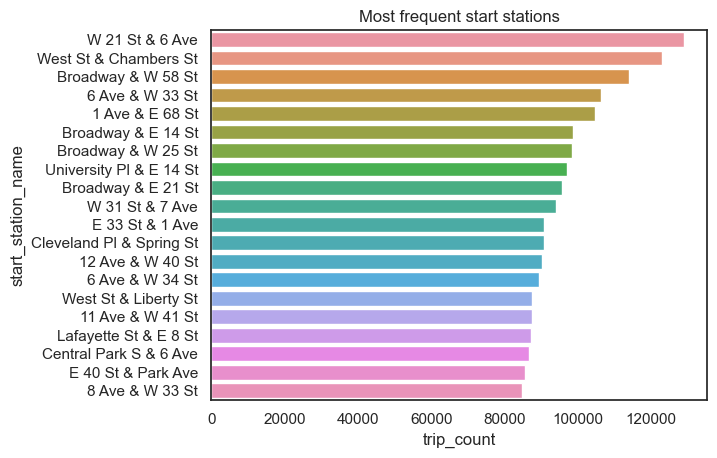

In [39]:
# Plot the top 20 start stations with the highest trip counts

sns.barplot(data = top20, x = 'trip_count', y = 'start_station_name')
plt.title("Most frequent start stations")
plt.show()

### Does the color palette you chose when you set the theme in the previous step make sense in this plot? If not, change the style of this specific plot temporarily. Hint: Does the default setting of the palette contain enough colors?

#### It does not make any sense, that is because the number of bars is higher to the initial shades available in the color palette, to solve this i just need to specify in the code that i require 20 shades in this case.

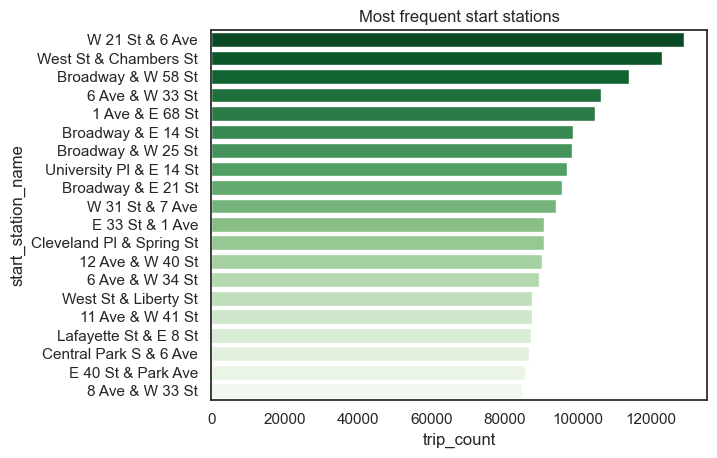

In [40]:
# Plot the top 20 start stations using a reversed blue color palette

sns.barplot(data = top20, x = 'trip_count', y = 'start_station_name', palette=("Greens_r"))
plt.title("Most frequent start stations")
plt.show()

### 5. Recreate the dual-axis line plot from the previous Exercise using seaborn.

In [41]:
# Import Merged Trips Temperatures DataFrame

temp_trips = pd.read_csv(os.path.join(path, 'ny_temp_trips.csv'))

In [42]:
# Inspect First 5 Rows of the Dataframe

temp_trips.head(5)

,Unnamed: 0,date,total_trips,avgTemp
0,0,2022-01-01,20198,11.6
1,1,2022-01-02,42203,11.4
2,2,2022-01-03,32453,1.4
3,3,2022-01-04,35869,-2.7
4,4,2022-01-05,33689,3.2


In [43]:
# Drop Unnecessary Columns

temp_trips = temp_trips.drop(columns=['Unnamed: 0'])

In [44]:
# Rename Columns For Better Clarity and Consistency

temp_trips = temp_trips.rename(columns={
    'date': 'trip_date',
    'total_trips': 'trip_totals',
    'avgTemp': 'avg_temp'})

In [45]:
# Inspect First 5 Rows of the Dataframe

temp_trips.head(5)

,trip_date,trip_totals,avg_temp
0,2022-01-01,20198,11.6
1,2022-01-02,42203,11.4
2,2022-01-03,32453,1.4
3,2022-01-04,35869,-2.7
4,2022-01-05,33689,3.2


In [46]:
# Ensure the date columns are parsed as datetime

temp_trips['trip_date'] = pd.to_datetime(temp_trips['trip_date'])

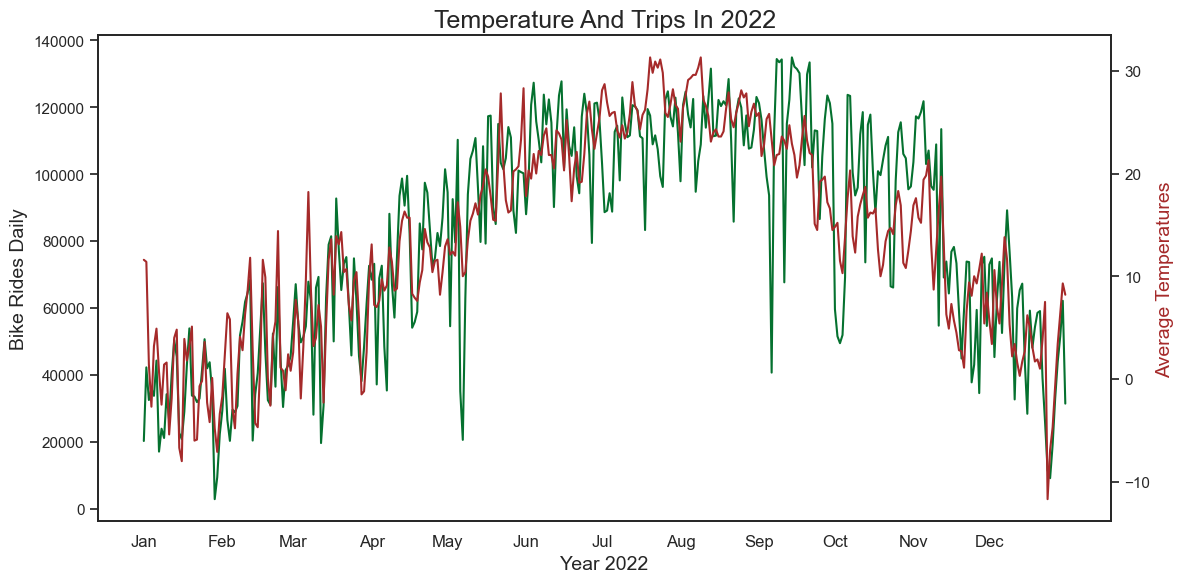

In [47]:
# Create a figure and primary axis for the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot daily trip counts on the primary axis
sns.lineplot(data=temp_trips, x="trip_date", y="trip_totals", ax=ax1)
ax1.set_xlabel("Year 2022", fontsize=14)
ax1.set_ylabel("Bike Rides Daily", fontsize=14)

# Add a secondary axis and plot daily average temperatures
ax2 = ax1.twinx()
sns.lineplot(data=temp_trips, x="trip_date", y="avg_temp", ax=ax2, color="brown")
ax2.set_ylabel("Average Temperatures", color="brown", fontsize=14)

# Identify all dates that correspond to the first day of each month
month_starts = temp_trips.loc[temp_trips['trip_date'].dt.day == 1, 'trip_date']

# Set x-axis ticks at month starts and label them with abbreviated month names
ax1.set_xticks(month_starts)
ax1.set_xticklabels(month_starts.dt.strftime('%b'), fontsize=12)

# Add title, adjust layout, and display the final combined plot
plt.title("Temperature And Trips In 2022", fontsize=18)
plt.tight_layout()
plt.show()

### 6. Make a box plot of one of the categorical variables in your data set.
### What does this plot tell you about the variable?
### Write down a 3 to 5-sentence analysis of the elements of the box plot.

In [48]:
# List all column names in the dataframe

df.columns

Index(['ride_id', 'bicycle_type', 'rent_start_time', 'rent_end_time',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_latitude', 'start_longitude', 'end_latitude',
       'end_longitude', 'customer_type', 'trip_duration', 'date', 'avg_temp',
       'trip_count'],
      dtype='object')

In [49]:
# Convert the datetime columns to proper datetime format

df['rent_start_time'] = pd.to_datetime(df['rent_start_time'])
df['rent_end_time'] = pd.to_datetime(df['rent_end_time'])

In [50]:
# Recalculate trip duration from scratch (in minutes)

df['trip_duration'] = (df['rent_end_time'] - df['rent_start_time']).dt.total_seconds() / 60

In [51]:
# Display summary statistics for the trip_duration column

df['trip_duration'].describe()

count    2.976828e+07
mean     1.601734e+01
std      2.473186e+02
min     -5.728892e+01
25%      5.788700e+00
50%      1.013900e+01
75%      1.792063e+01
max      4.044810e+05
Name: trip_duration, dtype: float64

In [52]:
# Remove negative durations

df = df[df['trip_duration'] >= 0]

In [55]:
# Remove rare super long trips

df = df[df['trip_duration'] < 200]

In [56]:
# Check Again

df['trip_duration'].describe()

count    2.970781e+07
mean     1.426449e+01
std      1.426853e+01
min      1.000233e+00
25%      5.781217e+00
50%      1.011767e+01
75%      1.784845e+01
max      1.999977e+02
Name: trip_duration, dtype: float64

In [57]:
# Round the trip_duration values and convert them to integers

df['trip_duration'] = df['trip_duration'].round().astype(int)

In [58]:
df.head(5)

,ride_id,bicycle_type,rent_start_time,rent_end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_latitude,start_longitude,end_latitude,end_longitude,customer_type,trip_duration,date,avg_temp,trip_count
0,9D0DC440CB40CF8E,electric_bike,2022-08-27 13:56:47.728,2022-08-27 14:02:56.651,Flatbush Ave & Ocean Ave,3704.04,3 St & Prospect Park West,3865.05,40.663657,-73.963014,40.668132,-73.973638,casual,6,2022-08-27,27.8,1
1,2214991DFBE5C4D7,electric_bike,2022-08-20 10:37:02.756,2022-08-20 10:45:56.631,Forsyth St\t& Grand St,5382.07,E 11 St & 1 Ave,5746.14,40.717798,-73.993161,40.729538,-73.984267,casual,9,2022-08-20,27.9,1
2,20C5D469563B6337,classic_bike,2022-08-31 18:55:03.051,2022-08-31 19:03:37.344,Perry St & Bleecker St,5922.07,Grand St & Greene St,5500.02,40.735354,-74.004831,40.721700,-74.002381,member,9,2022-08-31,25.6,1
3,3E8791885BC189D1,classic_bike,2022-08-02 08:05:00.250,2022-08-02 08:16:52.063,FDR Drive & E 35 St,6230.04,Grand Army Plaza & Central Park S,6839.1,40.744219,-73.971212,40.764397,-73.973715,member,12,2022-08-02,26.4,1
4,8DBCBF98885106CB,electric_bike,2022-08-25 15:44:48.386,2022-08-25 15:55:39.691,E 40 St & 5 Ave,6474.11,Ave A & E 14 St,5779.11,40.752052,-73.982115,40.730311,-73.980472,member,11,2022-08-25,28.1,1


#### To focus the analysis on typical trip behavior, I removed rides with negative duration and trips longer than 200 minutes (≈3.3 hours).
#### Such long trips are very rare in docked bike share systems and are more likely due to docking/recording errors than genuine continuous usage.
#### The rows removed are anyway around 60K, which are about 0,2% of the dataset total, therefore in this case is reasonable to say that eliminating them is ok.

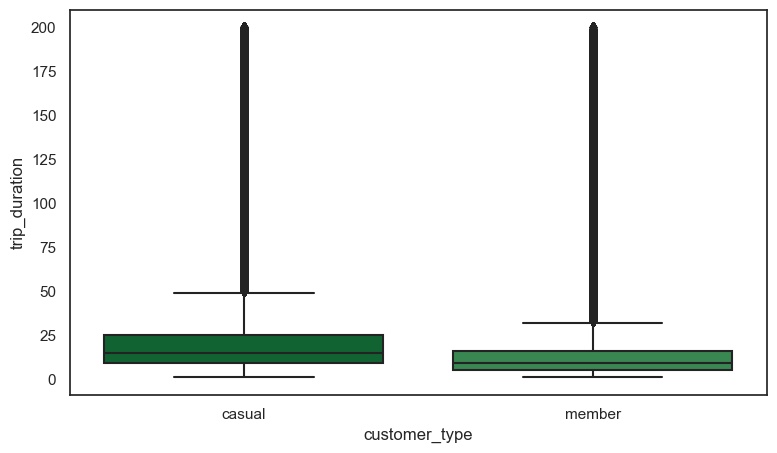

In [59]:
# Create a boxplot comparing trip duration distribution between casual and member customers

plt.figure(figsize=(9,5)) # Create a new figure with a width of 9 and height of 5 inches
sns.boxplot(x = 'customer_type', y = 'trip_duration', data = df) # Plot a boxplot of trip duration by customer type using custom colors for each category
plt.show() # Display the final chart output on the screen

#### The box plot compares trip duration between casual riders and members.
#### Casual users have a noticeably higher median trip duration and a much wider spread, suggesting they take longer and more varied rides, likely for leisure.
#### Member riders show shorter, more consistent trip times, indicating routine commuting behavior.
#### The large number of outliers shows that some trips are extremely long, but they don’t distort the overall distribution.
#### Overall, the plot highlights clear behavioral differences between the two customer groups.

### 7. Think of how the FacetGrid plot would make sense to aid the analysis questions in the project.
### Create a FacetGrid and write 2 to 3 sentences analyzing what insight its output brings.

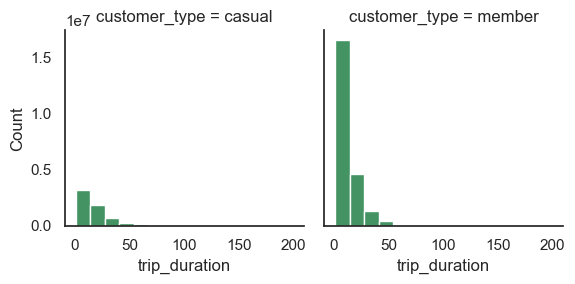

In [61]:
# Generate separate trips duration histograms for each customer type using a FacetGrid

grid = sns.FacetGrid(df, col = "customer_type") # Create a grid of subplots split into separate columns for each customer_type
grid.map(sns.histplot, "trip_duration", bins = 15) # Plot trip duration histograms with 15 bins inside each customer type subplot in the grid
plt.show() # Display the final chart output on the screen

#### I will try to increase the number of bins and limit the duration to two hours, just to try to achieve a more meaningful data subset to be plotted.

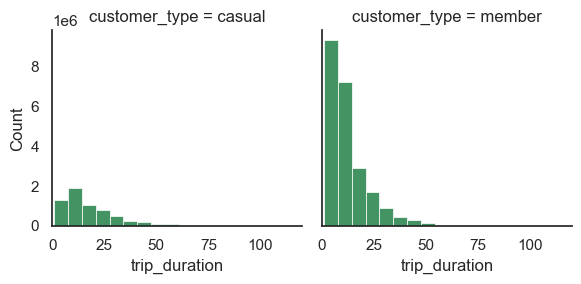

In [62]:
# Limit the x-axis to a realistic range

grid = sns.FacetGrid(df, col="customer_type")
grid.map(sns.histplot, "trip_duration", bins=30)
grid.set(xlim=(0, 120))
plt.show()

#### This FacetGrid compares trip duration distributions between casual and member riders, capped at a realistic 120 minute range.
#### Casual riders show a wider spread and generally take longer trips, while members display a much tighter distribution with shorter, more consistent ride times.
#### This visualization helps highlight clear behavioral differences between user groups, which is useful for understanding ridership patterns and informing operational decisions.

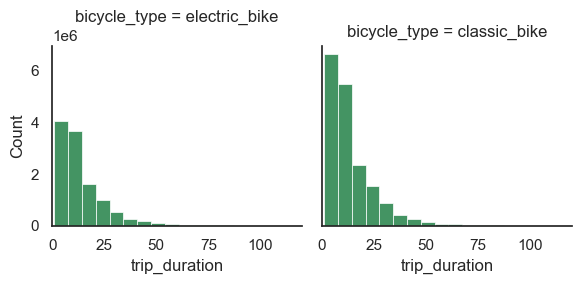

In [63]:
# Use Bicycle Type as 2nd variable to plot (always keeping a realistic range)

grid = sns.FacetGrid(df, col="bicycle_type")
grid.map(sns.histplot, "trip_duration", bins=30)
grid.set(xlim=(0, 120))
plt.show()

#### This FacetGrid compares trip duration distributions between electric and classic bikes, limited to a realistic maximum of 120 minutes.
#### Electric bikes show a higher concentration of very short trips, suggesting they are commonly used for quick and efficient point to point rides.
#### Classic bikes display a slightly broader spread of durations, indicating they may be used for longer or more leisurely trips compared to electric bikes.

#### **Added Observations On These FacetGrids**

#### The initial FacetGrid plot shows the raw distribution of trip durations for casual and member riders.
#### However, the extremely long trips introduce noise, so I refined the visualization by increasing the number of bins and capping the duration at 120 minutes.
#### This produces a clearer, more meaningful comparison between groups.
#### I also created a FacetGrid by bicycle type, which highlights how electric and classic bikes exhibit different duration patterns. 
#### Together, these plots provide a deeper understanding of user behavior.

In [64]:
# Export the dataframe to CSV file

df.to_csv(os.path.join(path, 'CB_Data', 'Prepared Data', 'ny_citybike_V2.csv'))